## Protoyping choropleth classification schemes from PySAL for use with GeoPandas


Under the hood, if PySAL is not available or if an unsupported classification scheme is specified, the choropleth classification would fall back to GeoPandas defaults.

In [1]:
import geodf as gdf

In [2]:
%matplotlib inline

In [3]:
reload(gdf)

<module 'geodf' from 'geodf/__init__.pyc'>

In [4]:
# we use PySAL for loading a test shapefile
# replace this cell if you have a local shapefile and want to use GeoPandas readers
import pysal as ps 
pth = ps.examples.get_path("columbus.shp")
tracts = gdf.GeoDataFrame.from_shapefile(pth)

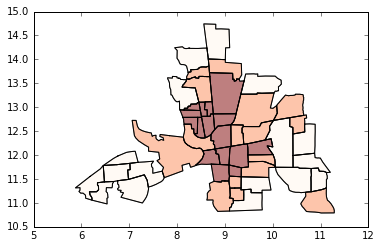

In [5]:
tracts.plot(column='CRIME', scheme='QUANTILES', k=3, colormap='OrRd')

Unrecognized scheme:  Unrecognized
Using Quantiles instead


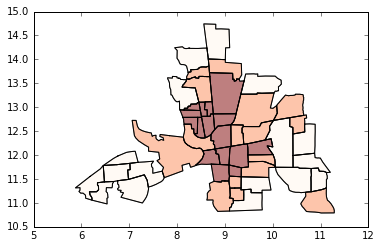

In [6]:
tracts.plot(column='CRIME', scheme='Unrecognized', k=3, colormap='OrRd')

Invalid k:  1
2<=k<=9, setting k=5 (default)


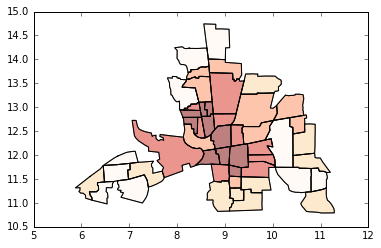

In [7]:
tracts.plot(column='CRIME', scheme='QUANTILES', k=1, colormap='OrRd')

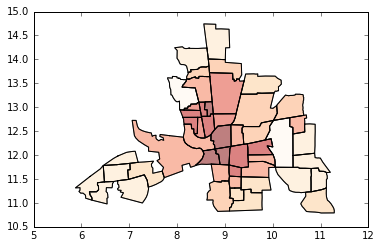

In [8]:
tracts.plot(column='CRIME', scheme='fisher_jenks', k=8, colormap='OrRd')

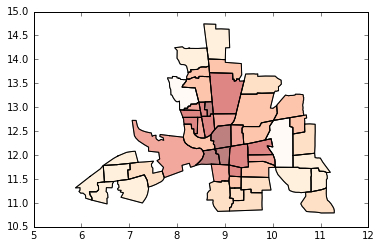

In [9]:
tracts.plot(column='CRIME', scheme='equal_interval', k=7, colormap='OrRd')

Invalid k:  12
2<=k<=9, setting k=5 (default)


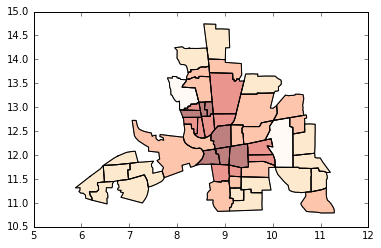

In [10]:
tracts.plot(column='CRIME', scheme='equal_interval', k=12, colormap='OrRd')

## Notes

This is only using a subset of the classifiers in PySAL. specifically those that take only an attribute and a value of k as an argument. This simplifies the number of new default parameters that would be required in GeoPandas.DataFrame.plot().

It is of course possible to add other classifiers with the cost of additional kw args.

In [18]:
south = ps.examples.get_path('south.shp')

In [19]:
south =  gdf.GeoDataFrame.from_shapefile(south)

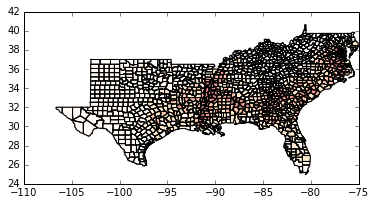

In [20]:
south.plot(column='BLK70', scheme='equal_interval', k=5, colormap='OrRd')

In [21]:
w = ps.queen_from_shapefile(ps.examples.get_path('south.shp'))

In [22]:
w.transform = 'r'

In [24]:
I = ps.Moran(south.BLK70, w)

In [26]:
I.I

0.78574015630448657

In [28]:
I.p_sim

0.001

In [29]:
sids = gdf.GeoDataFrame.from_shapefile(ps.examples.get_path('sids2.shp'))

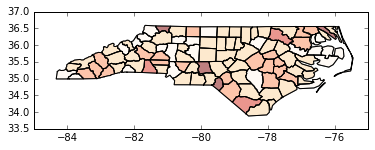

In [33]:
sids.plot(column='SIDR79', scheme='equal_interval', k=5, colormap='OrRd')

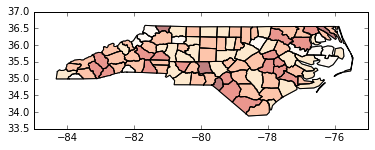

In [34]:
sids.plot(column='SIDR79', scheme='fisher_jenks', k=5, colormap='OrRd')

In [35]:
dir(sids.SIDR79)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__'

In [36]:
type(sids.SIDR79)

pandas.core.series.Series

In [37]:
type(sids)

geodf.geodataframe.GeoDataFrame

In [38]:
sids.SIDR74.get


<bound method Series.get of 0     0.916590
1     0.000000
2     1.568381
3     1.968504
4     6.333568
5     4.820937
6     0.000000
7     0.000000
8     4.132231
9     0.620347
10    1.932367
11    3.596314
12    2.393776
13    2.570694
14    1.834862
15    4.988914
16    1.831502
17    1.271456
18    0.755858
19    2.066116
20    1.331558
21    0.000000
22    0.788022
23    1.429593
24    0.843313
25    1.421157
26    2.782534
27    4.531722
28    1.264223
29    2.007528
        ...   
70    2.122241
71    1.942502
72    0.000000
73    2.786291
74    2.557545
75    1.220324
76    1.876173
77    0.000000
78    1.322314
79    1.845018
80    1.947420
81    1.865855
82    1.730104
83    1.021711
84    9.554140
85    4.685408
86    0.000000
87    1.610954
88    1.451379
89    0.000000
90    2.215406
91    3.547672
92    2.599032
93    3.929522
94    2.071251
95    4.489338
96    3.257329
97    4.477612
98    2.171553
99    2.292526
Name: SIDR74, dtype: float64>

In [39]:
dir(sids)

[u'AREA',
 u'BIR74',
 u'BIR79',
 u'CNTY_',
 u'CNTY_ID',
 u'CRESS_ID',
 u'FIPS',
 u'FIPSNO',
 u'NAME',
 u'NWBIR74',
 u'NWBIR79',
 u'NWR74',
 u'NWR79',
 u'PERIMETER',
 u'SID74',
 u'SID79',
 u'SIDR74',
 u'SIDR79',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 

In [42]:
sids.geometry

0     POLYGON ((-81.47275543212891 36.23435592651367...
1     POLYGON ((-81.23989105224609 36.36536407470703...
2     POLYGON ((-80.45634460449219 36.24255752563477...
3     (POLYGON ((-76.00897216796875 36.3195953369140...
4     POLYGON ((-77.21766662597656 36.24098205566406...
5     POLYGON ((-76.74506378173828 36.23391723632812...
6     POLYGON ((-76.00897216796875 36.31959533691406...
7     POLYGON ((-76.56250762939453 36.34056854248047...
8     POLYGON ((-78.30876159667969 36.26004028320312...
9     POLYGON ((-80.02567291259766 36.2502326965332,...
10    POLYGON ((-79.53050994873047 36.24613571166992...
11    POLYGON ((-79.53050994873047 36.24613571166992...
12    POLYGON ((-78.74912261962891 36.06359100341797...
13    POLYGON ((-78.80680084228516 36.23157501220703...
14    POLYGON ((-78.49252319335938 36.17358779907227...
15    POLYGON ((-77.33220672607422 36.0679817199707,...
16    POLYGON ((-76.29892730712891 36.21422958374023...
17    POLYGON ((-81.02056884765625 36.0349349975

In [43]:
type(sids.geometry)

geodf.geoseries.GeoSeries

In [44]:
g = sids.geometry

In [45]:
dir(g)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '

In [46]:
g.boundary

0     LINESTRING (-81.47275543212891 36.234355926513...
1     LINESTRING (-81.23989105224609 36.365364074707...
2     LINESTRING (-80.45634460449219 36.242557525634...
3     (LINESTRING (-76.00897216796875 36.31959533691...
4     LINESTRING (-77.21766662597656 36.240982055664...
5     LINESTRING (-76.74506378173828 36.233917236328...
6     LINESTRING (-76.00897216796875 36.319595336914...
7     LINESTRING (-76.56250762939453 36.340568542480...
8     LINESTRING (-78.30876159667969 36.260040283203...
9     LINESTRING (-80.02567291259766 36.250232696533...
10    LINESTRING (-79.53050994873047 36.246135711669...
11    LINESTRING (-79.53050994873047 36.246135711669...
12    LINESTRING (-78.74912261962891 36.063591003417...
13    LINESTRING (-78.80680084228516 36.231575012207...
14    LINESTRING (-78.49252319335938 36.173587799072...
15    LINESTRING (-77.33220672607422 36.067981719970...
16    LINESTRING (-76.29892730712891 36.214229583740...
17    LINESTRING (-81.02056884765625 36.03493499

In [47]:
g.bounds

,minx,miny,maxx,maxy
0,-81.741074,36.234356,-81.239891,36.589649
1,-81.347542,36.365364,-80.903442,36.572865
2,-80.965775,36.233883,-80.435310,36.565212
3,-76.330254,36.072819,-75.773155,36.557163
4,-77.901207,36.162766,-77.075310,36.556286
5,-77.217667,36.230236,-76.707497,36.556286
6,-76.563583,36.169727,-75.957184,36.556057
7,-76.953674,36.294518,-76.460350,36.555252
8,-78.321251,36.195946,-77.898857,36.552944
9,-80.453011,36.250233,-80.024055,36.551044


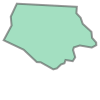

In [48]:
g[0]

In [49]:
g[0].bounds

(-81.74107360839844, 36.23435592651367, -81.2398910522461, 36.58964920043945)

In [52]:
natjson = gdf.GeoDataFrame(ps.examples.get_path('columbus.json'))

PandasError: DataFrame constructor not properly called!

In [ ]:
gdf